# Para trabajar con audio utilizaremos la siguiente librería

https://pypi.python.org/pypi/PySoundFile/0.8.1

In [313]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os


Fijemonos cuáles son las locuciones que tenemos para cada caso

In [314]:
fpaths = []
labels = []
spoken = []
for f in os.listdir('audio'):
    for w in os.listdir('audio/' + f):
        fpaths.append('audio/' + f + '/' + w)
        labels.append(f)
        if f not in spoken:
            spoken.append(f)
print('Words spoken:', spoken)

Words spoken: ['banana', 'lime', 'peach', 'orange', 'pineapple', 'kiwi', 'apple']


In [315]:
from scipy.io import wavfile
from scipy import signal
data = np.zeros((len(fpaths), 32000))
maxsize = -1
for n,file in enumerate(fpaths):
    _, d = wavfile.read(file)
    data[n, :d.shape[0]] = d
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
data = data[:, :maxsize]

#Each sample file is one row in data, and has one entry in labels
print('Number of files total:', data.shape[0])
all_labels = np.zeros(data.shape[0])
for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n
    
print('Labels and label indices', all_labels)

Number of files total: 98
Labels and label indices [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.]


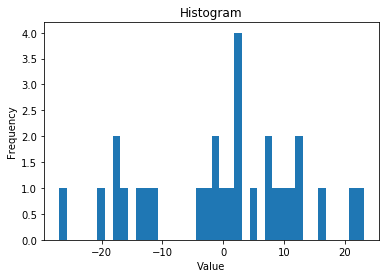

[[  1.90921867e+01  -1.54115540e+01  -2.08818123e+01  -4.66611806e+01
   -2.41030685e+01   7.49747176e+00  -2.04899948e+01   7.45261355e+00
   -5.28945797e+00  -2.52414725e+01  -9.09969649e+00   1.63860480e+01
    3.50452787e+00]
 [  2.03427579e+01  -9.39458749e+00  -4.04467377e+01  -4.54673964e+01
   -1.21942407e+01   1.67582493e+01  -2.64520700e+01   1.51846717e+00
   -1.91976772e+01  -3.47943047e+01   3.96190614e+00   8.45690719e+00
   -6.69040741e+00]
 [  2.08468878e+01  -8.69290469e+00  -3.85035763e+01  -4.06906548e+01
   -1.14907208e+01   2.14961252e+01  -3.29717649e+01   1.13058540e+01
   -3.17768370e+01  -2.79913149e+01   5.52832172e+00   1.44339260e+01
   -2.15378673e+01]
 [  2.04666385e+01  -6.74722014e+00  -3.68649369e+01  -3.64040128e+01
   -6.47607722e+00   2.31503102e+01  -2.75335199e+01   2.60160483e+01
   -2.30651908e+01  -1.25303446e+01   1.42222851e+01   1.16256268e+01
   -2.22523469e+01]
 [  1.92865576e+01   1.23944834e+00  -3.94695396e+01  -2.63481737e+01
   -9.3843

In [327]:
from python_speech_features import mfcc 
from python_speech_features import base
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

def mfcc_wav(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = mfcc(sig,rate, winlen=256/rate, winstep=128/rate,nfft=256,appendEnergy=True)
    return mfcc_feat

mfcc_feat=mfcc_wav("./audio/banana/banana02.wav")
plt.hist(mfcc_feat.T[5], bins=40)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
print(mfcc_feat)

In [337]:
from os import listdir
ref_path="./audio/"
feats=list()
for folder in sorted(listdir(ref_path)):
    for file in sorted(listdir(ref_path+folder)):
        abs_file=ref_path+folder+"/"+file
        feat_temp=mfcc_wav(abs_file)
        feats.append(feat_temp)

In [329]:
from pomegranate import *
import numpy as np
n_states=15
n_gauss=5
n_params=13
trans_mat = numpy.random.rand(n_states,n_states)
starts = numpy.array([1.0] + np.zeros(n_states-1).tolist())
ends = numpy.array(np.zeros(n_states-1).tolist()+ [0.1])
dists=[GeneralMixtureModel([MultivariateGaussianDistribution(10*np.random.randn(n_params),
    np.random.rand(n_params,n_params)*np.eye(n_params)) for i in range(n_gauss)]) for j in range(n_states)]
model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)

In [330]:
model.fit(feats)

9920099.815624041

In [331]:
model.fit(feats)

110.3475611897884

In [332]:
model.fit(feats)

463.43123687285697

In [333]:
model.fit(feats)

-62.40602100058459

In [334]:
for folder in sorted(listdir(ref_path)):
    print(folder)
    for file in sorted(listdir(ref_path+folder)):
        abs_file=ref_path+folder+"/"+file
        feat_temp=mfcc_wav(abs_file)
        print(model.predict(feat_temp))

apple
[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 11, 6]
[0, 13, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 5, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 10, 2, 10, 10, 10, 10, 10, 10, 5, 5, 11, 5, 5, 6]
[0, 2, 13, 2, 2, 2, 2, 2, 4, 4, 8, 2, 2, 0, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 2, 2, 6]
[0, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 12, 12, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 0, 4, 13, 4, 4, 4, 4, 4, 4, 4, 8, 8, 4, 1, 1, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 6]
[0, 0, 4, 4, 4, 4, 13, 4, 4, 4, 4, 4, 4, 4, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
[0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 6, 5, 5, 5, 5, 

[0, 8, 7, 7, 7, 1, 4, 4, 1, 1, 13, 13, 8, 8, 13, 13, 13, 13, 13, 13, 13, 2, 2, 2, 6, 6, 5, 5, 5, 5, 5, 5, 11, 5, 6]


In [250]:
mfcc_feat=mfcc_wav("./audio/pineapple/pineapple02.wav")
model.predict(mfcc_feat)

[0,
 20,
 20,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 27,
 27,
 31,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 28,
 28,
 2,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 24,
 13,
 24,
 24,
 24,
 24,
 28,
 28]

In [ ]:
mfcc_feat=mfcc_wav("./audio/apple/apple02.wav")
model.predict(mfcc_feat)

In [307]:
from os import listdir
model=[]
n_states=5
n_gauss=5
n_params=13
ref_path="./audio/"
feats=np.zeros([1,13])
transmat = np.zeros((n_states, n_states))
for i in range(n_states):
    if i == n_states-1:
        transmat[i, i] = 1.0
    else:
        transmat[i, i] = 0.5
        transmat[i, i+1] = 0.5
startprob = np.zeros(n_states)
startprob[0] = 1.0
model= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }
states= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }

for folder in sorted(listdir(ref_path)):
    print("Processing " + folder)
    feats=list()
    states[folder]=[State(GeneralMixtureModel([MultivariateGaussianDistribution(10*np.random.rand(n_params), 10*np.random.rand(n_params,n_params)*np.eye(n_params)) for i in range(n_gauss)]), name="Estado"+str(j)) for j in range(n_states)]
    model[folder] = HiddenMarkovModel()
    model[folder].add_states(states[folder])
    model[folder].add_transition(model[folder].start, states[folder][0], 1)
    for i in range(n_states-2):
        model[folder].add_transition(states[folder][i],states[folder][i],0.4)
        model[folder].add_transition(states[folder][i],states[folder][i+1],0.3)
        model[folder].add_transition(states[folder][i],states[folder][i+2],0.3)
    model[folder].add_transition(states[folder][n_states-1],states[folder][n_states-1],0.5)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-2],0.4)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-1],0.3)
    model[folder].add_transition(states[folder][n_states-2],model[folder].end,0.3)
    model[folder].add_transition(states[folder][n_states-1],model[folder].end,0.5)
    model[folder].bake()
    for file in sorted(listdir(ref_path+folder)):
        abs_file=ref_path+folder+"/"+file
        feat_temp=mfcc_wav(abs_file)
        feats.append(feat_temp)
    print(model[folder].fit(feats))
    print(model[folder].fit(feats))

Processing apple
286314.8155938435
483.32302288418214
Processing banana
331282.6361949825
1.6565900295972824e-07
Processing kiwi
304103.7697879564
-8.462302503176033e-08
Processing lime
306448.26475094206
-2.3352185962721705e-08
Processing orange
569895.4055666748
8.505594450980425e-09
Processing peach
442248.7408396982
-2.10711732506752e-08
Processing pineapple
421169.3544150924
8.854840416461229e-08


In [310]:
mfcc_feat=mfcc_wav("./lime01.wav")
for folder in sorted(listdir(ref_path)):
    print(folder)
    a=model[folder].viterbi(mfcc_feat)
    print(a[0])

apple
-3649.5330746529185
banana
-3710.270184167131
kiwi
-5838.58093725739
lime
-2950.9588614385443
orange
-7977.639871734038
peach
-5253.601317335607
pineapple
-3106.230031877768


In [311]:
model["banana"].dense_transition_matrix()

array([[ 0.95605868,  0.03138666,  0.01255466,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.94096872,  0.05903128,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.57302522,  0.0304982 ,  0.39647659,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.96346582,
         0.        ,  0.03653418],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

In [312]:
model["banana"]

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "GeneralMixtureModel",
                "distributions" : [
                    {
                        "class" : "Distribution",
                        "name" : "MultivariateGaussianDistribution",
                        "parameters" : [
                            [
                                5.4881350392732475,
                                7.151893663724195,
                                6.027633760716439,
                                5.448831829968968,
                                4.236547993389047,
                                6.

In [369]:
from minisom import MiniSom
### Initialization and training ###
X=20
Y=20
som = MiniSom(X,Y,13,sigma=2.5,learning_rate=0.5)
som.random_weights_init(feats[0])

In [370]:
som.weights.shape

(20, 20, 13)

In [371]:
for i in range(len(feats)):
    som.train_random(np.array(feats[i]),100)

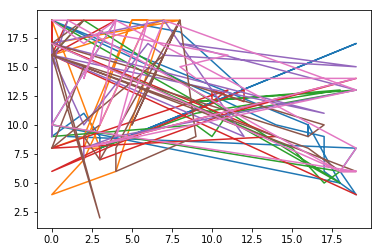

In [372]:
for feat in feats[0:7]:
    x=list()
    y=list()
    for i in feat:
        x_aux,y_aux = som.winner(i)
        x.append(x_aux)
        y.append(y_aux)
    plt.plot(x,y)
plt.show()

In [379]:
flat_feats=np.vstack(np.array(feats))

In [380]:
som.train_random(np.array(flat_feats),1000)

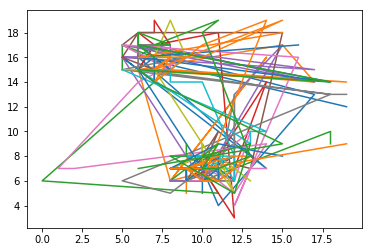

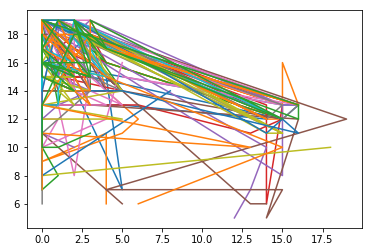

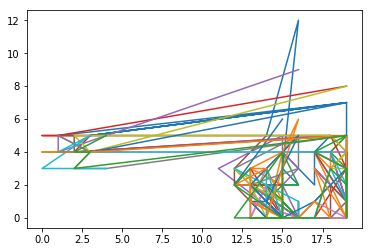

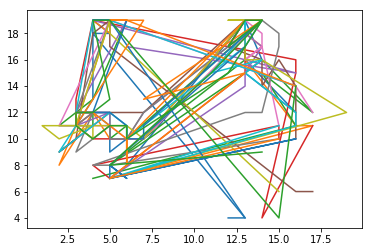

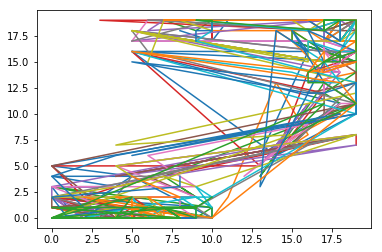

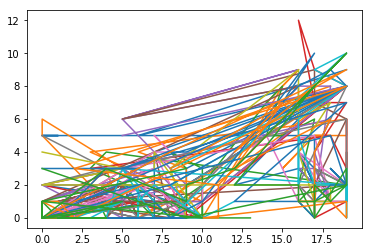

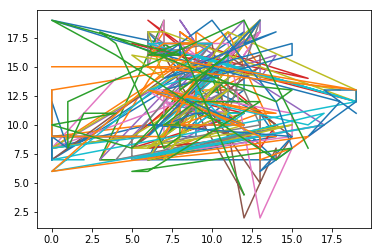

In [382]:
for i in range(7):
    for feat in feats[i*14:i*14+13]:
        x=list()
        y=list()
        for i in feat:
            x_aux,y_aux = som.winner(i)
            x.append(x_aux)
            y.append(y_aux)
        plt.plot(x,y)
    plt.show()


## Opción 1: alimentar una vanilla net 

Debatir cómo sería

## Opción 2: utilizar las neuronas ganadoras como emisiones de una cadena de Markov

In [459]:
from os import listdir
model=[]
n_states=5
n_gauss=5
n_params=13
ref_path="./audio/"
model= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }
states= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }
var=dict()
for i in range(20):
    for j in range(20):
        var[str(i)+","+str(j)]=1/400
DiscreteDistribution(var)
for folder in sorted(listdir(ref_path)):
    print("Processing " + folder)
    feats=list()
    states[folder]=[State(DiscreteDistribution(var)) for j in range(n_states)]
    model[folder] = HiddenMarkovModel()
    model[folder].add_states(states[folder])
    model[folder].add_transition(model[folder].start, states[folder][0], 1)
    for i in range(n_states-2):
        model[folder].add_transition(states[folder][i],states[folder][i],0.4)
        model[folder].add_transition(states[folder][i],states[folder][i+1],0.3)
        model[folder].add_transition(states[folder][i],states[folder][i+2],0.3)
    model[folder].add_transition(states[folder][n_states-1],states[folder][n_states-1],0.5)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-2],0.4)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-1],0.3)
    model[folder].add_transition(states[folder][n_states-2],model[folder].end,0.3)
    model[folder].add_transition(states[folder][n_states-1],model[folder].end,0.5)
    model[folder].bake()
    for file in sorted(listdir(ref_path+folder)):
        abs_file=ref_path+folder+"/"+file
        feat_temp=mfcc_wav(abs_file)
        w=list()
        for fe in feat_temp:
            x,y=som.winner(fe)
            w.append(str(x)+","+str(y))
        feats.append(w)
    print(model[folder].fit(feats))
    print(model[folder].fit(feats))

Processing apple
1169.6121203828752
9.115410648519173e-10
Processing banana
1484.7022192369925
9.868017514236271e-10
Processing kiwi
1256.8503033192032
9.829363989410922e-10
Processing lime
1386.3050736995447
8.724327926756814e-10
Processing orange
2158.032427018807
9.349605534225702e-10
Processing peach
1772.1606296633609
9.911218512570485e-10
Processing pineapple
1443.0862457338944
9.772520570550114e-10


In [460]:
model["apple"]

{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "0,0" : 0.0,
                        "0,1" : 0.0,
                        "0,2" : 0.0,
                        "0,3" : 0.0,
                        "0,4" : 0.0,
                        "0,5" : 0.0,
                        "0,6" : 0.053337891098651974,
                        "0,7" : 0.0,
                        "0,8" : 0.0,
                        "0,9" : 0.0,
                        "0,10" : 0.0,
                

In [462]:
mfcc_feat=mfcc_wav("./apple01.wav")
w=list()
feat_test=list()
for fe in mfcc_feat:
    x,y=som.winner(fe)
    w.append(str(x)+","+str(y))
for folder in sorted(listdir(ref_path)):
    print(folder)
    a=model[folder].viterbi(w)
    print(a[0])

apple
-inf
banana
-inf
kiwi
-inf
lime
-inf
orange
-inf
peach
-inf
pineapple
-inf


¿A qué se debe el fallo del modelo anterior? ¿Se podría arreglar?

A continuación se utilizan Gaussianas Multivariables en vez de distribuciones discretas.

In [463]:
from os import listdir
model=[]
n_states=5
n_gauss=5
n_params=13
ref_path="./audio/"
model= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }
states= {"banana":'',
       "apple":'',
       "lime":'',
       "pineapple":'',
        "orange":'',
        "kiwi":'', 
        "peach":''
       }
var=dict()
d1 = MultivariateGaussianDistribution([1, 6, 3], [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
d2 = MultivariateGaussianDistribution([2, 8, 4], [[1, 0, 0], [0, 1, 0], [0, 0, 2]])
d3 = MultivariateGaussianDistribution([0, 4, 8], [[2, 0, 0], [0, 3, 0], [0, 0, 1]])
for i in range(20):
    for j in range(20):
        var[str(i)+","+str(j)]=1/400
DiscreteDistribution(var)
for folder in sorted(listdir(ref_path)):
    print("Processing " + folder)
    feats=list()
    states[folder]=[State(MultivariateGaussianDistribution(2*np.random.rand(2), [[1, 0.5],[0.5,1]])) for j in range(n_states)]
    model[folder] = HiddenMarkovModel()
    model[folder].add_states(states[folder])
    model[folder].add_transition(model[folder].start, states[folder][0], 1)
    for i in range(n_states-2):
        model[folder].add_transition(states[folder][i],states[folder][i],0.4)
        model[folder].add_transition(states[folder][i],states[folder][i+1],0.3)
        model[folder].add_transition(states[folder][i],states[folder][i+2],0.3)
    model[folder].add_transition(states[folder][n_states-1],states[folder][n_states-1],0.5)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-2],0.4)
    model[folder].add_transition(states[folder][n_states-2],states[folder][n_states-1],0.3)
    model[folder].add_transition(states[folder][n_states-2],model[folder].end,0.3)
    model[folder].add_transition(states[folder][n_states-1],model[folder].end,0.5)
    model[folder].bake()
    for file in sorted(listdir(ref_path+folder)):
        abs_file=ref_path+folder+"/"+file
        feat_temp=mfcc_wav(abs_file)
        w=list()
        for fe in feat_temp:
            x,y=som.winner(fe)
            w.append([x,y])
        feats.append(w)
    print(model[folder].fit(feats))
    print(model[folder].fit(feats))

Processing apple
25518.089563201473
4.2177816794719547e-10
Processing banana
54851.91478144683
101.41009908338174
Processing kiwi
36578.50558617726
-0.26061035628231366
Processing lime
36314.915836971544
537.2257197084373
Processing orange
66282.02592855605
284.0921404902074
Processing peach
32724.78908696707
4.4019543565809727e-10
Processing pineapple
37248.06412541846
-55.13463462366781


In [467]:
for folder in sorted(listdir(ref_path)):
    print("\n\nTesteando:"+folder)
    mfcc_feat=mfcc_wav("./"+folder+"01.wav")
    w=list()
    feat_test=list()
    for fe in mfcc_feat:
        x,y=som.winner(fe)
        w.append([x,y])
    for folder2 in sorted(listdir(ref_path)):
        print(folder2)
        a=model[folder2].viterbi(w)
        print(a[0])



Testeando:apple
apple
-79.96153384733367
banana
-1250535.8051921902
kiwi
-574.9888418245657
lime
-981.2571262931567
orange
-622.149016518331
peach
-327.9288267910708
pineapple
-155.02154505787746


Testeando:banana
apple
-231.55007627005608
banana
-85.81347005071436
kiwi
-1246.494391188364
lime
-249.05110357003943
orange
-50429.01425049713
peach
-617.0731886083663
pineapple
-182.91951349891943


Testeando:kiwi
apple
-242.77577691294096
banana
-714.9337115234715
kiwi
-112.67884788436146
lime
-615.3815773625572
orange
-8450230.817395905
peach
-214.3200146810922
pineapple
-50273.70242013623


Testeando:lime
apple
-309.17239881703307
banana
-617.8484782214896
kiwi
-1550.618591542805
lime
-103.50019856683387
orange
-253.66824365806832
peach
-725.8395030166139
pineapple
-160.90341165482403


Testeando:orange
apple
-445.90382999321844
banana
-455.1734383536327
kiwi
-2126.745686106301
lime
-437.44130927135217
orange
-252.5363310166467
peach
-883.6076674448859
pineapple
-378.984779084461


Te